In [151]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
#hello
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
from os import listdir
import tensorflow as tf
from os.path import isfile, join
import zipfile

In [153]:
from keras import layers 
from keras.layers import Input,Dropout, Add, Dense, Activation,GlobalAveragePooling2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.initializers import glorot_uniform
from keras.optimizers import Adam
import keras.backend as K

In [154]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

In [155]:
def get_image(file_name):
    im=Image.open(file_name)
    return im.resize((224,224),Image.ANTIALIAS)
def get_image_folder_list(folder_name):
    return [f for f in listdir(folder_name) if isfile(join(folder_name,f))]
def gettin_array(folder):
    image_list=get_image_folder_list(folder)
    m=[]   
    for i in image_list:
        k=np.array(get_image(folder+i))
     
        m.append(k[np.newaxis:,])
    return m

In [156]:
kl = get_image_folder_list("/home/pranav/Desktop/carrot_train")

In [157]:
print(kl)

['32464343-single-carrot-isolated.jpg', '800px_COLOURBOX6094544.jpg', 'images.jpeg', '14238857-single-carrot.jpg', '133458741-1024x1024.jpg', 'single-carrot-picture_csp18892772.jpg', '6676768-one-single-fresh-carrot-isolated-on-white-background.jpg', '800px_COLOURBOX3339628.jpg']


In [158]:
kl = np.array(get_image("/home/pranav/Desktop/carrot_train/images.jpeg"))

In [159]:
print(kl.shape)

(224, 224, 3)


In [160]:
train_carrot = np.array(gettin_array("/home/pranav/Desktop/carrot_train/"))
train_y_carrot = np.zeros((train_carrot.shape[0],1)) # creating y as 1 for training datasets

In [161]:
print(train_y_carrot.shape)

(8, 1)


In [162]:
print(train_carrot.shape)

(8, 224, 224, 3)


In [163]:
train_cuccumber =  np.array(gettin_array("/home/pranav/Desktop/cuccumber/"))

In [164]:
print(train_cuccumber.shape)

(11, 224, 224, 3)


In [165]:
train_x = np.concatenate((train_cuccumber,train_carrot),axis=0)

In [166]:
print(train_x.shape)

(19, 224, 224, 3)


In [167]:
train_y_cuccumber = np.ones((train_cuccumber.shape[0],1))

In [168]:
print(train_y_cuccumber.shape)

(11, 1)


# pre processing y part of program

In [169]:
train_y = np.concatenate((train_y_cuccumber,train_y_carrot),axis = 0)
print(train_y.shape)

(19, 1)


In [170]:
base_model = InceptionV3(weights='imagenet', include_top=True)

In [171]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, None, None, 3 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, None, None, 3 0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

In [172]:
for i,layer in enumerate(base_model.layers):
    print(i,layer.name)

0 input_2
1 conv2d_95
2 batch_normalization_95
3 activation_95
4 conv2d_96
5 batch_normalization_96
6 activation_96
7 conv2d_97
8 batch_normalization_97
9 activation_97
10 max_pooling2d_5
11 conv2d_98
12 batch_normalization_98
13 activation_98
14 conv2d_99
15 batch_normalization_99
16 activation_99
17 max_pooling2d_6
18 conv2d_103
19 batch_normalization_103
20 activation_103
21 conv2d_101
22 conv2d_104
23 batch_normalization_101
24 batch_normalization_104
25 activation_101
26 activation_104
27 average_pooling2d_10
28 conv2d_100
29 conv2d_102
30 conv2d_105
31 conv2d_106
32 batch_normalization_100
33 batch_normalization_102
34 batch_normalization_105
35 batch_normalization_106
36 activation_100
37 activation_102
38 activation_105
39 activation_106
40 mixed0
41 conv2d_110
42 batch_normalization_110
43 activation_110
44 conv2d_108
45 conv2d_111
46 batch_normalization_108
47 batch_normalization_111
48 activation_108
49 activation_111
50 average_pooling2d_11
51 conv2d_107
52 conv2d_109
53 co

In [174]:
X = base_model.get_layer('conv2d_179').output

In [175]:
X = GlobalAveragePooling2D()(X)
X = Dense(256,activation='relu')(X)
X = Dense(128,activation='relu')(X)
pred = Dense(1,activation='sigmoid')(X)

In [176]:
model = Model(inputs=base_model.input,outputs=pred)

In [177]:
for layer in base_model.layers[:268]:
    layer.trainable = False

In [178]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [179]:
model.fit(train_x,train_y,epochs=10,batch_size =10)

Epoch 1/10
19/19 [==============================] - 6s 310ms/step - loss: 0.6180 - acc: 0.6316
Epoch 2/10
19/19 [==============================] - 3s 166ms/step - loss: 0.2873 - acc: 1.0000
Epoch 3/10
19/19 [==============================] - 3s 164ms/step - loss: 0.1100 - acc: 1.0000
Epoch 4/10
19/19 [==============================] - 3s 166ms/step - loss: 0.0573 - acc: 1.0000
Epoch 5/10
19/19 [==============================] - 3s 166ms/step - loss: 0.0146 - acc: 1.0000
Epoch 6/10
19/19 [==============================] - 3s 163ms/step - loss: 0.0085 - acc: 1.0000
Epoch 7/10
19/19 [==============================] - 3s 163ms/step - loss: 9.6170e-04 - acc: 1.0000
Epoch 8/10
19/19 [==============================] - 3s 163ms/step - loss: 6.0869e-05 - acc: 1.0000
Epoch 9/10
19/19 [==============================] - 3s 163ms/step - loss: 1.5594e-04 - acc: 1.0000
Epoch 10/10
19/19 [==============================] - 3s 167ms/step - loss: 1.0252e-04 - acc: 1.0000


(1, 224, 224, 3)


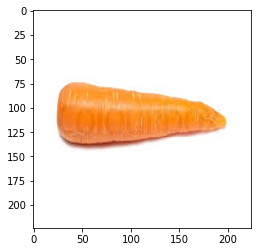

In [180]:
any_im = train_x[np.random.randint(len(train_x))]
plt.imshow(any_im)
any_im = np.expand_dims(any_im, axis=0)
print (any_im.shape)
valpred = model.predict(x=any_im)


In [181]:
valpred

array([[1.2457595e-38]], dtype=float32)

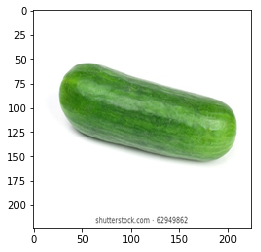

In [182]:
any_im = train_x[np.random.randint(len(train_x))]
plt.imshow(any_im)
any_im = np.expand_dims(any_im, axis=0)

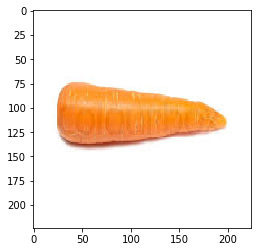

In [183]:
img=image.load_img('/home/pranav/Desktop/carrot_train/images.jpeg',target_size=(224,224))
plt.imshow(img)

In [184]:
x=image.img_to_array(img)
x=preprocess_input(x).reshape(1,224,224,3)

In [185]:
prediction=model.predict(x)
model.predict(x)



array([[3.2423657e-05]], dtype=float32)

In [186]:
if prediction[0,0]>0.5:
    print('cuccumber')
else:
    print('carrot')

carrot
